In [5]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import missingno
import pandas_profiling
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [6]:
df = pd.read_csv(r"usercarlist.csv")
df

,Unnamed: 0,carbrandname,yearofthemake,price,kilometersdriven,transmission,fueltype,owner
0,0,Maruti,2013,"₹3,03,099","49,944 km",MANUAL,Diesel,2nd Owner
1,1,Toyota,2011,"₹3,35,499","85,707 km",MANUAL,Petrol,1st Owner
2,2,Maruti,2009,"₹2,04,199","38,160 km",MANUAL,Petrol,1st Owner
3,3,Maruti,2009,"₹2,07,799","44,191 km",MANUAL,Petrol,1st Owner
4,4,Volkswagen,2014,"₹4,46,899","62,625 km",MANUAL,Petrol,1st Owner
...,...,...,...,...,...,...,...,...
175,175,Toyota,2014,"₹9,96,799","69,958 km",MANUAL,Diesel,1st Owner
176,176,Ford,2014,"₹4,66,899","78,005 km",MANUAL,Diesel,1st Owner
177,177,Maruti,2016,"₹5,23,999","72,334 km",MANUAL,Petrol,1st Owner
178,178,Ford,2013,"₹3,89,699","80,946 km",MANUAL,Diesel,2nd Owner


In [7]:
#cleaning the data


In [8]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df['kilometersdriven'] = df['kilometersdriven'].str.replace(' km', '')
df['kilometersdriven'] = df['kilometersdriven'].str.replace(',', '')
df['kilometersdriven'] = df['kilometersdriven'].astype(int)

df['price'] = df['price'].str.replace('₹', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(int)

df

#removing the unnamed column.
#price = removing currency symbol and , symbol and converted to numerical data.
#kilometersdriven = removing the km and , symbol and converted to numerical data.

,carbrandname,yearofthemake,price,kilometersdriven,transmission,fueltype,owner
0,Maruti,2013,303099,49944,MANUAL,Diesel,2nd Owner
1,Toyota,2011,335499,85707,MANUAL,Petrol,1st Owner
2,Maruti,2009,204199,38160,MANUAL,Petrol,1st Owner
3,Maruti,2009,207799,44191,MANUAL,Petrol,1st Owner
4,Volkswagen,2014,446899,62625,MANUAL,Petrol,1st Owner
...,...,...,...,...,...,...,...
175,Toyota,2014,996799,69958,MANUAL,Diesel,1st Owner
176,Ford,2014,466899,78005,MANUAL,Diesel,1st Owner
177,Maruti,2016,523999,72334,MANUAL,Petrol,1st Owner
178,Ford,2013,389699,80946,MANUAL,Diesel,2nd Owner


# Exploratory Data Analysis (EDA)

In [9]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head()


We have 180 Rows and 7 Columns in our dataframe


,carbrandname,yearofthemake,price,kilometersdriven,transmission,fueltype,owner
0,Maruti,2013,303099,49944,MANUAL,Diesel,2nd Owner
1,Toyota,2011,335499,85707,MANUAL,Petrol,1st Owner
2,Maruti,2009,204199,38160,MANUAL,Petrol,1st Owner
3,Maruti,2009,207799,44191,MANUAL,Petrol,1st Owner
4,Volkswagen,2014,446899,62625,MANUAL,Petrol,1st Owner


In [10]:
df.isna().sum() # checking for missing values

carbrandname        0
yearofthemake       0
price               0
kilometersdriven    0
transmission        2
fueltype            0
owner               0
dtype: int64

In [11]:
mode = ["transmission"]

for i in mode:
    df[i] = df[i].fillna(df[i].mode()[0])
    
#replacing the object data type columns in Mode Value

In [12]:
df.isna().sum() # checking for missing values once again after replacing the missing NA.

carbrandname        0
yearofthemake       0
price               0
kilometersdriven    0
transmission        0
fueltype            0
owner               0
dtype: int64

In [13]:
df.info()

#Using the info method we are able to confirm the non null count details as well as the datatype information. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   carbrandname      180 non-null    object
 1   yearofthemake     180 non-null    int64 
 2   price             180 non-null    int32 
 3   kilometersdriven  180 non-null    int32 
 4   transmission      180 non-null    object
 5   fueltype          180 non-null    object
 6   owner             180 non-null    object
dtypes: int32(2), int64(1), object(4)
memory usage: 8.6+ KB


In [14]:
df.nunique() 

#With the help of nunique and sort_values methods we can see the number of unique values present in each of the columns in our dataset.

carbrandname         14
yearofthemake        12
price               178
kilometersdriven    180
transmission          2
fueltype              2
owner                 3
dtype: int64

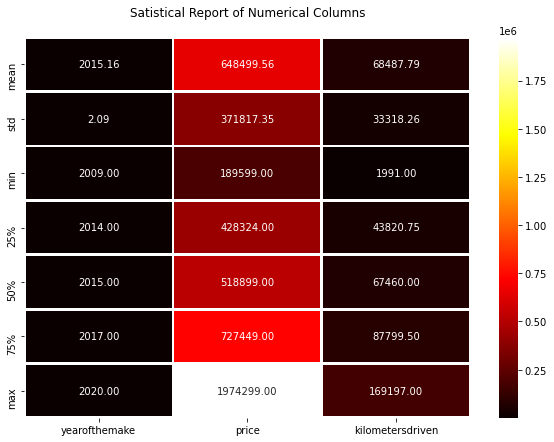

In [15]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,7))
sns.heatmap(round(df.describe()[1:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="hot")
plt.title("Satistical Report of Numerical Columns\n")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

# Visualization

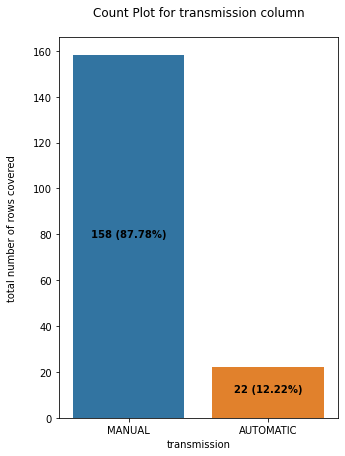

In [16]:
try:
    x = 'transmission'
    k=0
    plt.figure(figsize=[5,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

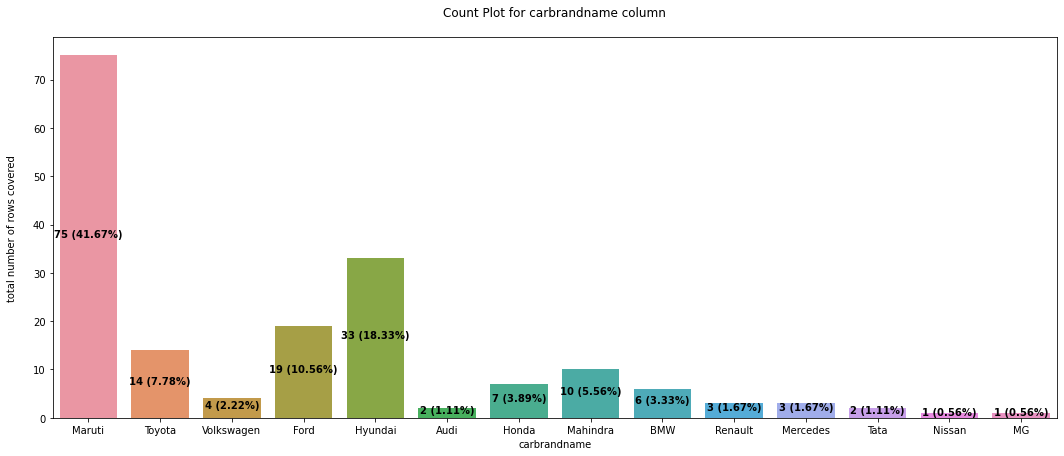

In [17]:
try:
    x = 'carbrandname'
    k=0
    plt.figure(figsize=[18,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

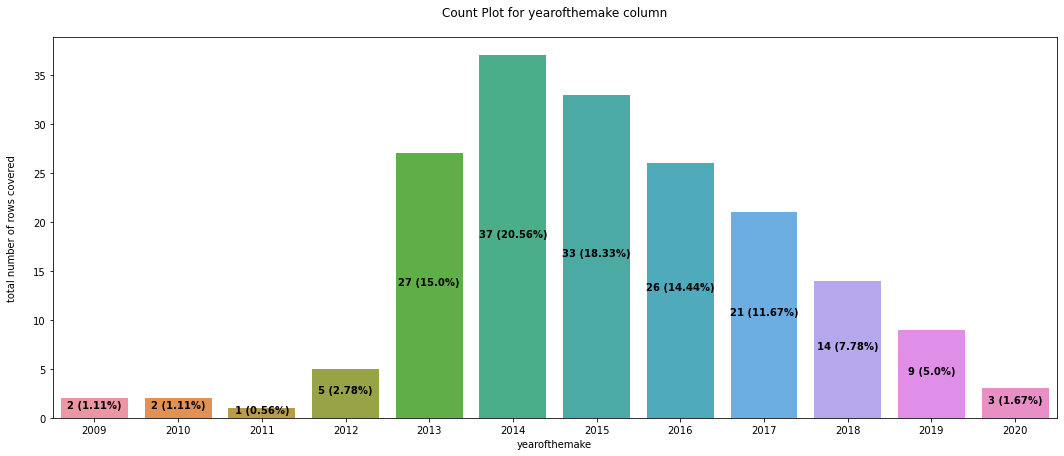

In [18]:
try:
    x = 'yearofthemake'
    k=0
    plt.figure(figsize=[18,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

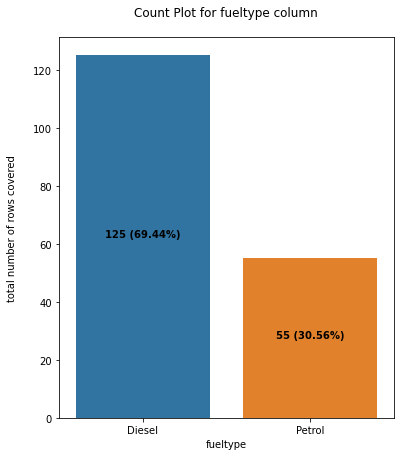

In [19]:
try:
    x = 'fueltype'
    k=0
    plt.figure(figsize=[6,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

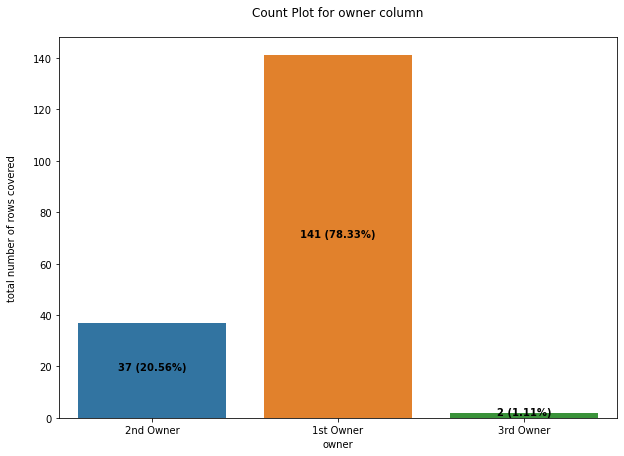

In [20]:
try:
    x = 'owner'
    k=0
    plt.figure(figsize=[10,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In [21]:
#transmission - Manual Transmission have more numbers.
#carbrandname - Maruti tops the list, followed by Hynda, Ford and Toyota. Least by MG & Nissan.
#yearofthemake - 2014 tops the list followed by 2015, 2013, 2016 and 2017. Least by 2011.
#fueltype - Diesel cars tops the list followed by Petrol.
#owner - 1st Owner tops the list follwed by 2nd Owner and the least is by 3rd Owner.

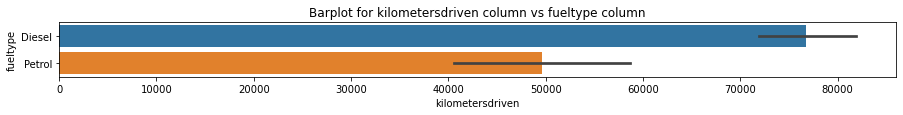

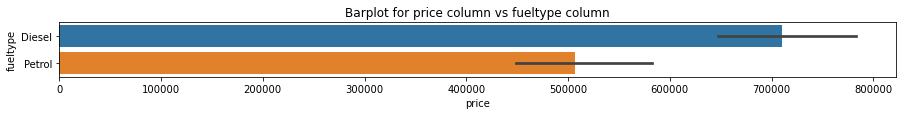

In [22]:
y = 'fueltype'

x = 'kilometersdriven'
plt.figure(figsize=[15,1])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'price'
plt.figure(figsize=[15,1])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

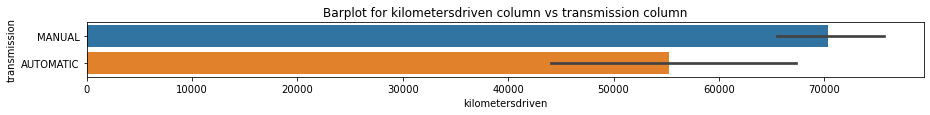

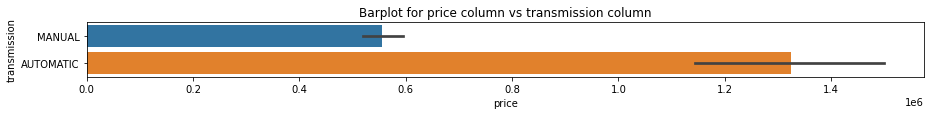

In [23]:
y = 'transmission'

x = 'kilometersdriven'
plt.figure(figsize=[15,1])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'price'
plt.figure(figsize=[15,1])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

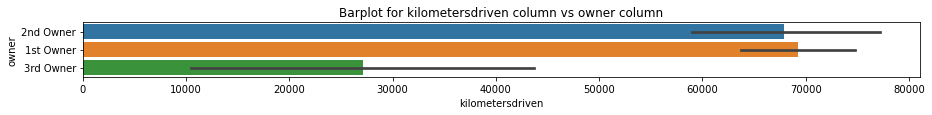

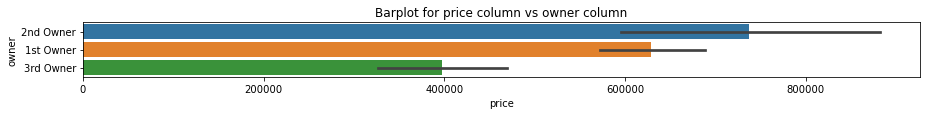

In [24]:
y = 'owner'

x = 'kilometersdriven'
plt.figure(figsize=[15,1])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'price'
plt.figure(figsize=[15,1])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

# Encoding the categorical object datatype columns

In [25]:
# Using Ordinal Encoder to encode the object datatype to encode.

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

column=["carbrandname", "transmission", "fueltype", "owner"]
df=ordinal_encode(df, column)
df

,carbrandname,yearofthemake,price,kilometersdriven,transmission,fueltype,owner
0,7.0,2013,303099,49944,1.0,0.0,1.0
1,12.0,2011,335499,85707,1.0,1.0,0.0
2,7.0,2009,204199,38160,1.0,1.0,0.0
3,7.0,2009,207799,44191,1.0,1.0,0.0
4,13.0,2014,446899,62625,1.0,1.0,0.0
...,...,...,...,...,...,...,...
175,12.0,2014,996799,69958,1.0,0.0,0.0
176,2.0,2014,466899,78005,1.0,0.0,0.0
177,7.0,2016,523999,72334,1.0,1.0,0.0
178,2.0,2013,389699,80946,1.0,0.0,1.0


In [26]:
print("Shape of our data frame post encoding shows {} Rows and {} columns\n".format(df.shape[0], df.shape[1]))

Shape of our data frame post encoding shows 180 Rows and 7 columns



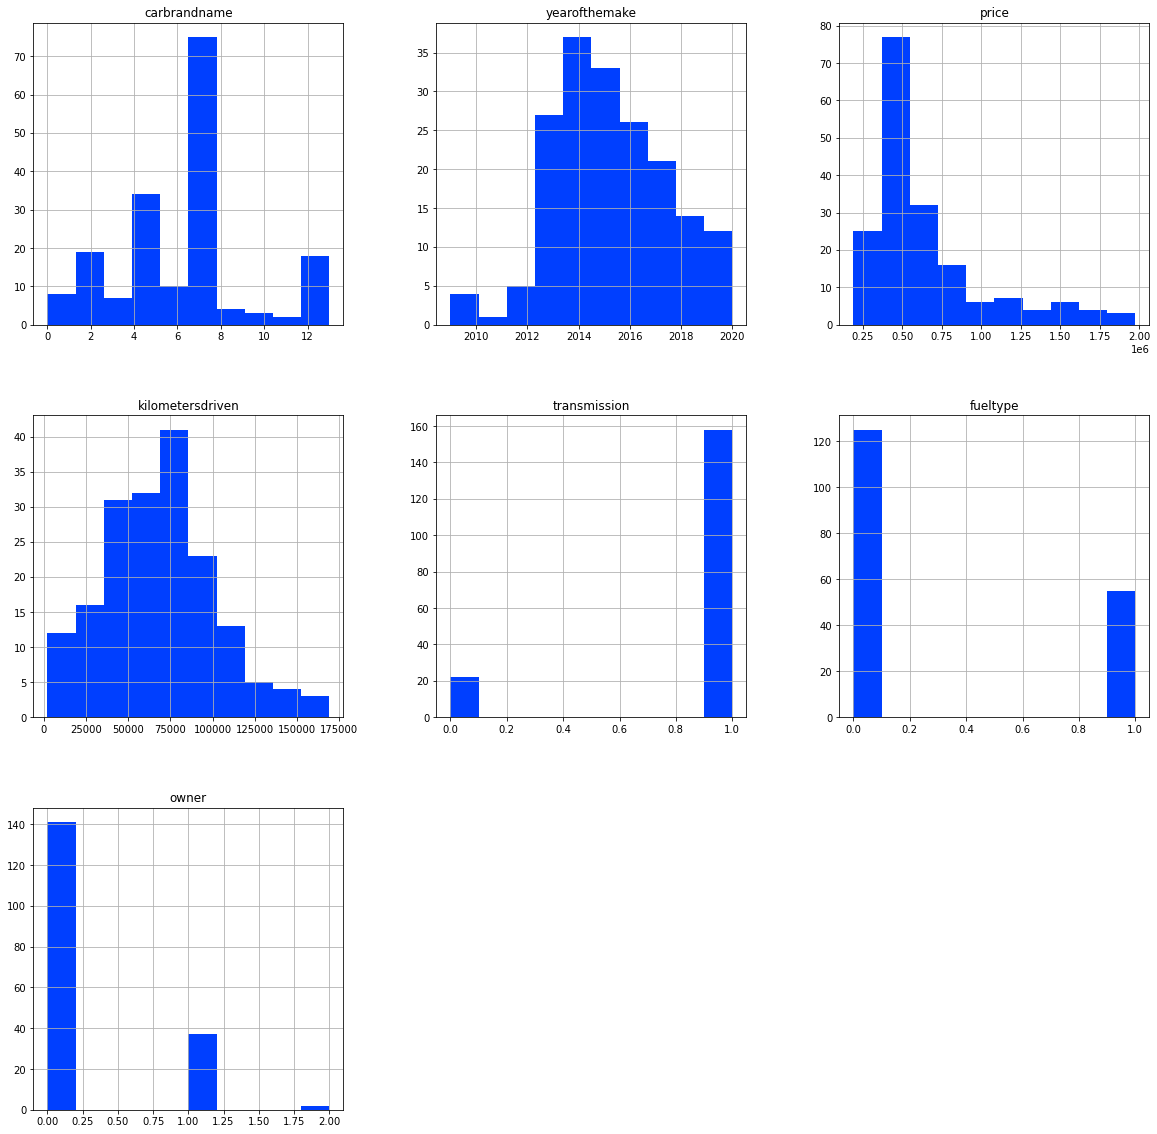

In [27]:
plt.style.use('seaborn-bright')

df.hist(figsize=(20,20))
plt.show()

#With the help of below histogram we are able to see the data distribution for our dataset columns

# Correlation using a Heatmap

In [28]:
#Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
#Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

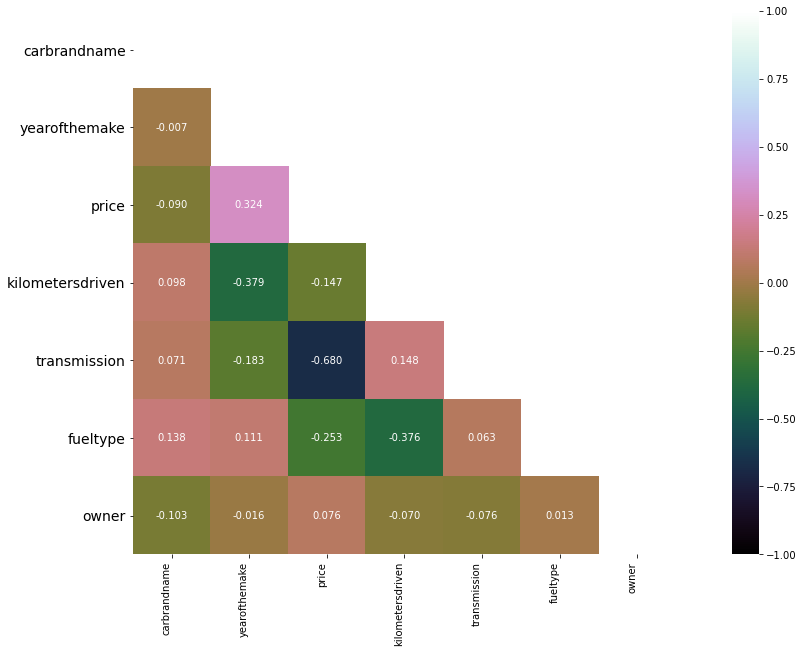

In [29]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(rotation = 90, ha='right')
plt.yticks(fontsize=14)
plt.show()

# Correlation Bar Plot comparing Gender column with the remaining columns

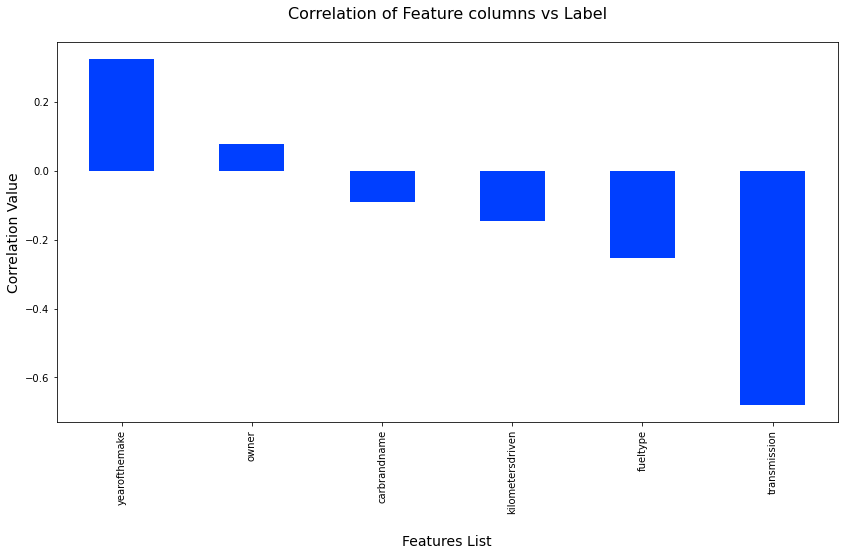

In [30]:
df_corr = df.corr()
plt.figure(figsize=(14,7))
df_corr['price'].sort_values(ascending=False).drop('price').plot.bar()
plt.title("Correlation of Feature columns vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=14)
plt.show()

In [31]:
#above Correlation method shows only yearofthemake and owner columns are positively correlated all others negatively correlated.

In [32]:
#Checking for outliers

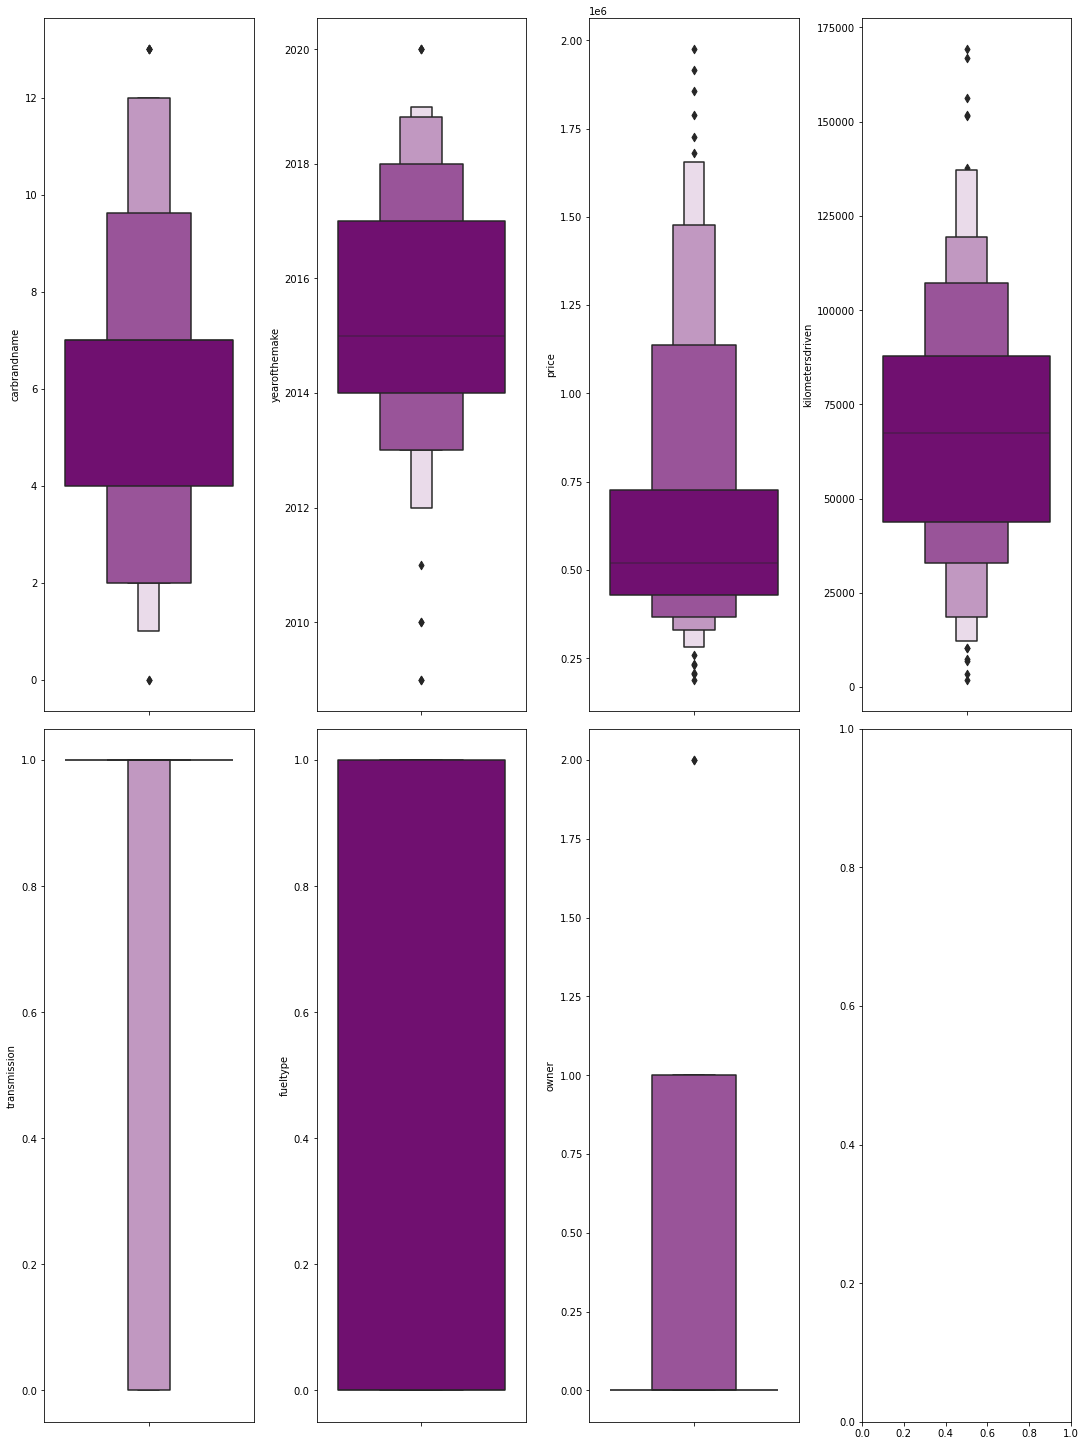

In [33]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(15,20))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxenplot(y=col, data=df, ax=ax[index], color="purple")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

#the below result shows that there is an Outliers in our data so decided continue without removing it.

In [34]:
# Using Z Score to remove outliers, the below result shows that less than 5% of the data loss.

z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (180, 7)
Shape of the dataframe after removing outliers:  (173, 7)
Percentage of data loss post outlier removal:  3.888888888888889


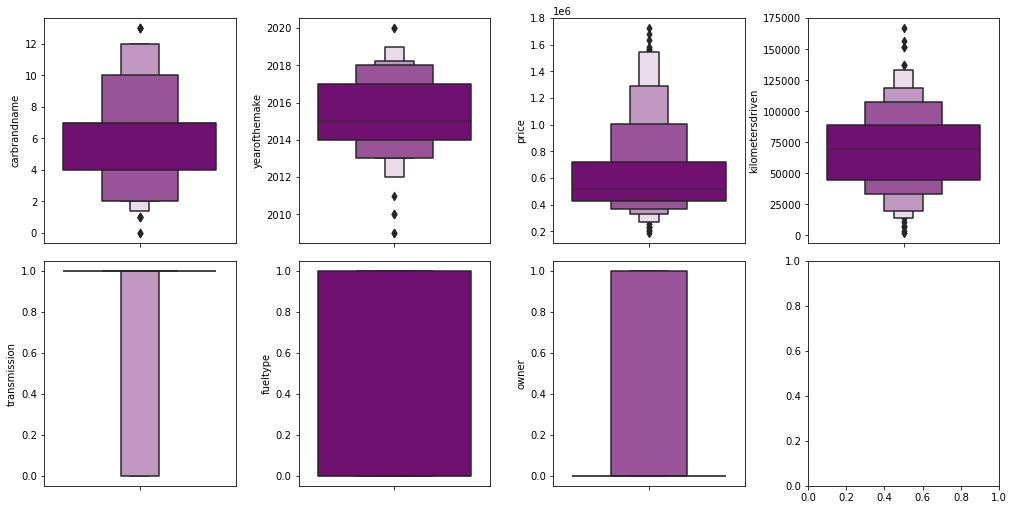

In [35]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(14,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxenplot(y=col, data=df, ax=ax[index], color="purple")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

#checking and confirming the outliers after updating it using z score.

In [36]:
df.skew()

#checking for skewness. the below result shows that there are columns present in our dataset that are above the acceptable range of +/-0.5 value.

carbrandname        0.386586
yearofthemake      -0.028902
price               1.658109
kilometersdriven    0.359952
transmission       -2.616433
fueltype            0.847496
owner               1.495047
dtype: float64

In [37]:
# Using Log Transform to fix skewness

df_log=df.copy()
for col in df_log.columns:
    if df_log.skew().loc[col]>0.55:
        df_log[col]=np.log1p(df_log[col])

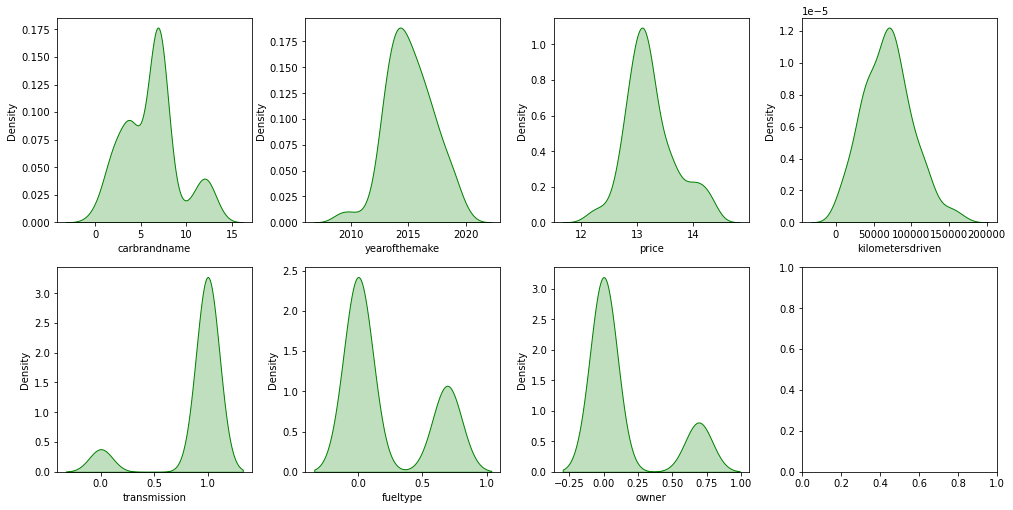

In [38]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(14,7))
index = 0
ax = ax.flatten()
for col, value in df_log.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

#With the help of below distribution plots I see that almost all the columns now have a bell shape curve retaining the normal distribution form.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [39]:
X = df_log.drop('price', axis=1)
Y = df_log['price']

#Have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column

# Feature Scaling

In [40]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

#Scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

,carbrandname,yearofthemake,kilometersdriven,transmission,fueltype,owner
0,0.291675,-1.030461,-0.580209,0.340777,-0.66458,1.985663
1,1.962531,-1.999318,0.522057,0.340777,1.50471,-0.503610
2,0.291675,-2.968175,-0.943409,0.340777,1.50471,-0.503610
3,0.291675,-2.968175,-0.757525,0.340777,1.50471,-0.503610
4,2.296702,-0.546032,-0.189363,0.340777,1.50471,-0.503610


# Finding the best random state for building Regression Models

In [41]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu*100,"on Random State", maxRS)

Best R2 score is 72.23179947264433 on Random State 323


In [42]:
#Here we see that out of the random state value ranging from 1 to 1000 the best random state number found is "251" and we will use this in our ML models.

# Feature importance bar graph

,Importance
Features,
transmission,0.284
yearofthemake,0.263
carbrandname,0.244
kilometersdriven,0.127
fueltype,0.071
owner,0.011


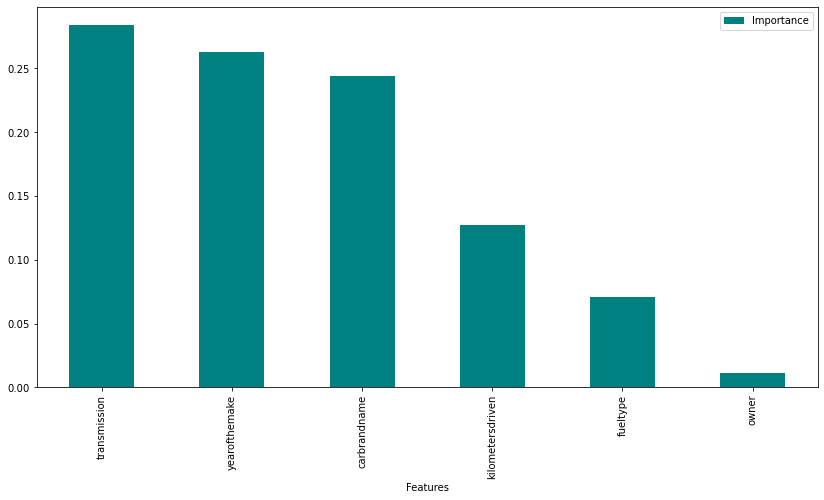

In [43]:
rf=RandomForestRegressor()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
plt.rcParams["figure.figsize"] = (14,7)
importances.plot.bar(color='teal')
importances

#below result shows the importance of our label value.

# Machine Learning Model for Regression with Evaluation Metrics

In [44]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=251)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)
    
#Have built a regression function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [45]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 0.28971448537353084
R2 Score is: 53.160515862316245
Cross Validation Score: 31.56274972078697
R2 Score - Cross Validation Score is 21.597766141529274


In [46]:
# Ridge Regularization

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 0.2896217348974263
R2 Score is: 53.190501860658266
Cross Validation Score: 31.551035783578342
R2 Score - Cross Validation Score is 21.639466077079923


In [47]:
# Lasso Regularization

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 0.35676692908774604
R2 Score is: 28.97015552034461
Cross Validation Score: 0.6496454264556051
R2 Score - Cross Validation Score is 28.320510093889002


In [48]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 0.39167670236477525
R2 Score is: 14.389474500155885
Cross Validation Score: -15.091274282066278
R2 Score - Cross Validation Score is 29.480748782222165


In [49]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 0.3636628404056999
R2 Score is: 26.197761192518854
Cross Validation Score: -34.57139182603969
R2 Score - Cross Validation Score is 60.76915301855854


In [50]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 0.33533528775808746
R2 Score is: 37.24762058158094
Cross Validation Score: 10.66127687124869
R2 Score - Cross Validation Score is 26.58634371033225


In [51]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 0.3319224766103296
R2 Score is: 38.5184216644463
Cross Validation Score: 12.28458504991764
R2 Score - Cross Validation Score is 26.233836614528663


In [52]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 0.36999754792057027
R2 Score is: 23.604218971870083
Cross Validation Score: 38.36114184748215
R2 Score - Cross Validation Score is -14.75692287561207


In [53]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 0.2940190528185047
R2 Score is: 51.75829686529057
Cross Validation Score: 21.139390312287503
R2 Score - Cross Validation Score is 30.618906553003065


In [54]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.2683801325731891
R2 Score is: 59.804965140053156
Cross Validation Score: 45.53956705109156
R2 Score - Cross Validation Score is 14.265398088961597


# Hyper parameter tuning

In [55]:
# Choosing Extra Trees Regressor

fmod_param = {'n_estimators' : [100, 200, 300],
              'criterion' : ['squared_error', 'mse', 'absolute_error', 'mae'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 251, 340]
             }

GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 251, 340]})

In [56]:
GSCV.best_params_

{'criterion': 'mse', 'n_estimators': 200, 'n_jobs': -1, 'random_state': 42}

In [57]:
Final_Model = ExtraTreesRegressor(criterion='mse', n_estimators=300, n_jobs=-1, random_state=42)
Model_Training = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 61.95540997477418


# Prediction of Used Car Price

In [58]:
Predicted_Price = Final_Model.predict(X)
# Reversing the Log Transformation that was performed on the Target column while training the ML Model
Predicted_SalePrice = np.exp(Predicted_Price)
# Checking the predicted price details in dataframe format
predicted_output = pd.DataFrame()
predicted_output['Predicted Price'] = Predicted_SalePrice
predicted_output['Actual Price'] = df["price"]
predicted_output

,Predicted Price,Actual Price
0,318984.877242,303099.0
1,335500.000000,335499.0
2,204200.000000,204199.0
3,207800.000000,207799.0
4,446900.000000,446899.0
...,...,...
168,759666.683895,1724799.0
169,466900.000000,486499.0
170,524000.000000,379499.0
171,376366.225258,562699.0


In [59]:
#Have created a dataframe that shows us the predicted used car prices and the actual used car prices that was obtained by scraping data from the websites.

In [60]:
predicted_output.to_csv("carpriceprediction.csv")